In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = np.genfromtxt('../psc2_130m18.lf',skip_header=8,names=True)

In [3]:
file.dtype.names

('N', 'F606W', 'Log10N', 'Log10dN')

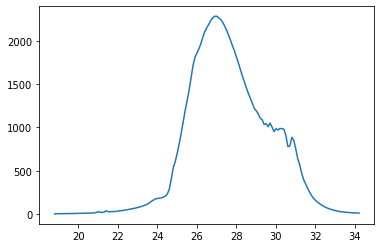

In [4]:
plt.plot(file['F606W']+21.66,10**file['Log10dN'])

plt.show()

In [5]:
idx1 = np.logical_and(file['F606W']+21.66<=22.1,file['F606W']+21.66>=22)

In [6]:
cut1 = file[idx1]

In [7]:
print(cut1['F606W']+21.66)
print(10**cut1['Log10dN'])

[22.011]
[33.91563869]


In [8]:
cat = np.genfromtxt('/Volumes/Samsung_T5/photRun0520/drcPhot29Apr/catDir_PISCES-II/PISCES-II_fullCat.dat',
                    names=True)

In [9]:
print(min(cat['magr_f606w']),max(cat['magr_f606w']))

19.403931802090085 28.93975547644679


In [10]:
(28.9-19.4)/0.1

95.0

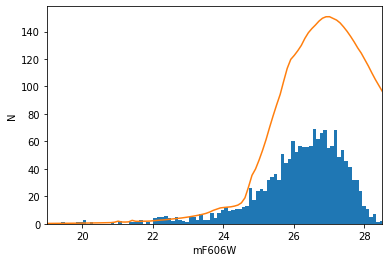

In [11]:
fig,ax = plt.subplots()

ax.hist(cat['magr_f606w'],bins=95)
ax.plot(file['F606W']+21.66,10**file['Log10dN']*0.066)

ax.set_xlim(19,28.5)
ax.set_xlabel('mF606W')
ax.set_ylabel('N')

plt.show()

In [12]:
idx = np.logical_and(cat['magr_f606w']<=22.1,cat['magr_f606w']>=22.0)

In [13]:
cut = cat[idx]
print(len(cut))

3


In [14]:
def diff_func(lf_mag,lf_num,dat,norm,dm=21.31):
    
#     fig,ax = plt.subplots()
    
    bins = np.linspace(22,24,21)
    
    idxes = np.digitize(lf_mag+dm,bins=bins)
    bin_sum = [(10**lf_num[idxes == i]).sum() for i in range(0, len(bins))]
    
    scaled = np.array(bin_sum)*norm
    
    dat_binned = ax.hist(dat,bins=np.hstack((bins,bins[-1]+0.1)))
    
    chi_sq = (scaled[1:]-dat_binned[0][1:])**2/scaled[1:]
#     chi_sq = (scaled[1:]-dat_binned[0][1:])**2/np.sqrt(dat_binned[0][1:])**2
#     plt.close()
    
    return chi_sq.sum()
    

In [15]:
# norm_arr = np.linspace(0.01,0.10,19)
norm_arr = np.linspace(0.065,0.07,5)

In [16]:
(0.07-0.065)/0.001

5.000000000000004

In [17]:
print(norm_arr)

[0.065   0.06625 0.0675  0.06875 0.07   ]


In [18]:
# chi_arr = np.zeros((len(norm_arr)))
# for nn, val in enumerate(norm_arr):
#     chi_arr[nn] = diff_func(file['F606W'],file['Log10dN'],cat['magr_f606w'],val,dm=21.66)

In [19]:
# norm_arr[np.argsort(chi_arr)]

In [20]:
print(min(file['F606W']),max(file['F606W']))

-2.849 12.551


In [21]:
(12.6+2.9)/0.1

155.0

In [22]:
bin_arr = np.linspace(-2.9,12.6,156)
print(bin_arr[:5])

[-2.9 -2.8 -2.7 -2.6 -2.5]


In [23]:
# scale = 0.066

In [24]:
def sum_mag(logdN,mag,bins,scale):

    temp =  10**(-0.4*mag) * scale * (10**logdN) 
    empt = np.zeros((len(temp)))
    for tt in range(len(temp)):
        df = abs(10**(-0.4 * (bins[tt+1])) - 10**(-0.4 * (bins[tt])))
        empt[tt] = temp[tt]*df
    # calculate bin width (which changes) in flux from magnitude
    # flux of a given star * scale * number of stars at that magnitude point
    
    val = -2.5 * np.log10(empt.sum())
    
    return val
        

In [25]:
def err_mag(logdN,mag,bins,scale,num=100):

    new_mags = np.zeros(num)
    new_logs = np.zeros(len(logdN))
    
    for jj in range(len(new_mags)):
        s = np.random.randint(-100,101,len(logdN))
        for ii in range(len(logdN)):
            temp_val = 10**file['Log10dN'][ii] + (np.sqrt(10**file['Log10dN'][ii]) * s[ii]/100)
            if temp_val < 0:
                loop = True
                while loop:
                    ss = np.random.randint(-100,101,1)
                    temp_val = 10**file['Log10dN'][ii] + (np.sqrt(10**file['Log10dN'][ii]) * ss/100)
                    if temp_val >= 0:
                        loop = False
            new_logs[ii] = np.log10(temp_val)
            
        new_mags[jj] = sum_mag(new_logs,mag,bins,scale)
    print(new_mags)   
    val = np.std(new_mags)
    
    return val

In [26]:
mag1 = sum_mag(file['Log10dN'],file['F606W'],bins=bin_arr,scale=0.066)
print(mag1) # -4.1

-3.8894349088622517


In [28]:
err1 = err_mag(file['Log10dN'],file['F606W'],bins=bin_arr,scale=0.048,num=100)
print(err1)

[-3.51619613 -3.62673377 -3.60586567 -3.67627545 -3.56468981 -3.48695781
 -3.53210908 -3.50136119 -3.57604567 -3.55157457 -3.4698497  -3.59558452
 -3.53124    -3.62718077 -3.4988008  -3.52262877 -3.56068567 -3.40293861
 -3.56149086 -3.50410838 -3.50674012 -3.67868041 -3.47000907 -3.54698117
 -3.53109965 -3.47176346 -3.59626429 -3.62921184 -3.50978383 -3.47156443
 -3.59537546 -3.59373541 -3.50728326 -3.57513488 -3.5667403  -3.51611687
 -3.52108591 -3.43372625 -3.58650654 -3.51869977 -3.60297389 -3.59955992
 -3.49599056 -3.4765129  -3.45500814 -3.49152124 -3.57726978 -3.57113738
 -3.54676901 -3.67506601 -3.5269643  -3.68890389 -3.58762186 -3.57154528
 -3.53225259 -3.43498336 -3.49258803 -3.49761462 -3.47657583 -3.65564182
 -3.54769445 -3.49320009 -3.51831011 -3.58949714 -3.5374238  -3.46788111
 -3.47374055 -3.54911384 -3.52884169 -3.59849621 -3.5112431  -3.54648961
 -3.46954313 -3.48329577 -3.63656059 -3.56285594 -3.38852322 -3.60936755
 -3.56296005 -3.4799121  -3.51721003 -3.53252204 -3

In [27]:
def mag2lum(mag):
    
    L0 = 3.0128e28
    Lsun = 3.828e26

    num = L0 * 10**(-0.4 * mag)
    
    return num/Lsun

In [28]:
lum1 = mag2lum(mag1)
print(lum1)

2829.9081317886703


In [29]:
1.75e6/lum1

618.3946327946328

In [54]:
tryErr = err_mag(file['Log10dN'],file['F606W'],bins=bin_arr,scale=0.066)
# print(tryErr) # -4.1

In [55]:
print(tryErr)

2.692703184448015
